# Notebook 4: Ridge and Lasso Regression
Since we are dealing with a lot of multicollinearity in our world bank data, we expect Ridge and Lasso regression to perform better than the least squares regression from Notebook 2.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os
import tqdm
import glob
import pandas as pd
import sklearn
from src import ana_utils, vis_utils

from sklearn import linear_model

np.random.seed(1)

Import datasets from Notebook 1

In [3]:
wb_data = pd.read_csv("data/wb_data.csv", index_col="Country Name")
wb_data_short = pd.read_csv("data/wb_data_short.csv", index_col="Country Name")
whr_data = pd.read_csv("data/whr_data.csv", index_col="Country name")

## Ridge Regression

In [2]:
#Note: The alpha value was edited later, it corresponds to the alpha which yielded the best test loss after trying out a bunch of different alphas
ridge = sklearn.linear_model.Ridge(alpha=0.25)

Mean loss (full set of indicators): 0.32917660740659266
The average size of the first ten coefficients ((full set of indicators)): [ 0.5456  0.2287  0.3343  0.2901  0.1894 -0.1811  0.1433 -0.2759 -0.1294
 -0.9751] 

Mean loss (reduced set of indicators): 0.3283011594945492
The average size of the first ten coefficients (reduced set of indicators): [ 0.6094  0.2597  0.3114  0.1227  0.1165  0.1587 -0.3283 -0.1776 -1.2457
 -0.3656]


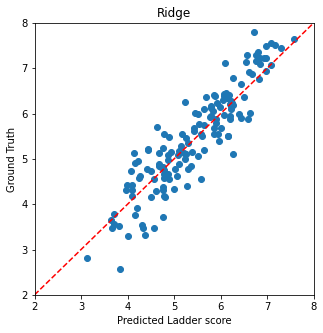

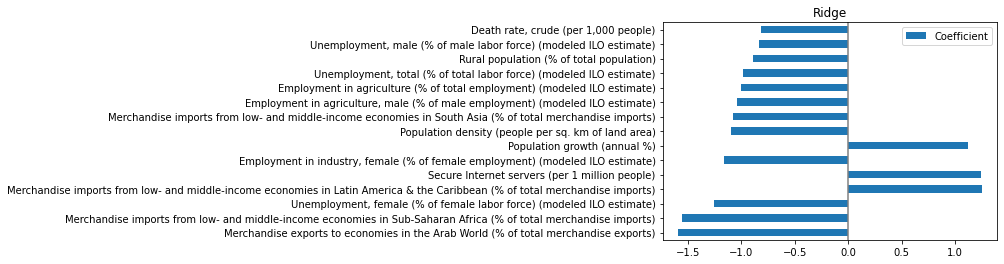

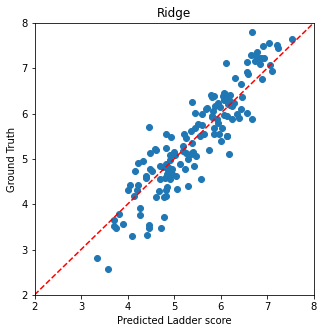

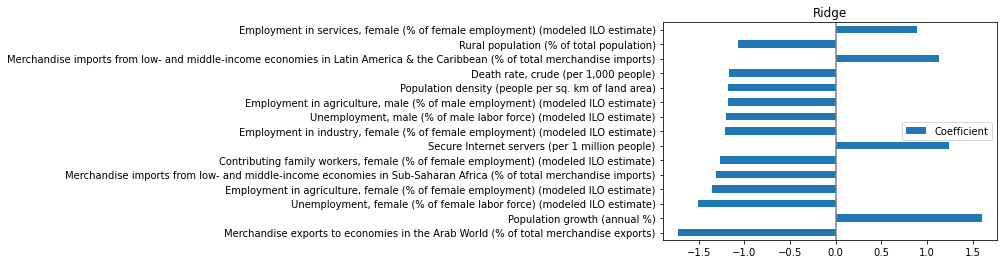

In [4]:
test_size = 30
# For the full dense indicator data
loss_list, mean_loss, coef_list, avg_coefs = ana_utils.n_fold_ceval(reg_model=ridge, n=1000, data=wb_data, gt=whr_data, test_size=test_size, scaling="normalize")
print("Mean loss (full set of indicators):", mean_loss)
print("The average size of the first ten coefficients ((full set of indicators)):", avg_coefs[:10], "\n")
vis_utils.visualize_predictions(reg_model=ridge, data=wb_data, gt=whr_data)
vis_utils.visualize_coefs(reg_model=ridge, indicators=wb_data.columns.values, n=15)

loss_list, mean_loss, coef_list, avg_coefs = ana_utils.n_fold_ceval(reg_model=ridge, n=1000, data=wb_data_short, gt=whr_data, test_size=test_size, scaling="normalize")
print("Mean loss (reduced set of indicators):", mean_loss)
print("The average size of the first ten coefficients (reduced set of indicators):", avg_coefs[:10])
vis_utils.visualize_predictions(reg_model=ridge, data=wb_data_short, gt=whr_data)
vis_utils.visualize_coefs(reg_model=ridge, indicators=wb_data_short.columns.values, n=15)


In [7]:
test_size = 30
# For the full dense indicator data
loss_list, mean_loss, coef_list, avg_coefs = ana_utils.n_fold_ceval(reg_model=ridge, n=1000, data=wb_data, gt=whr_data, test_size=test_size, scaling="normalize")

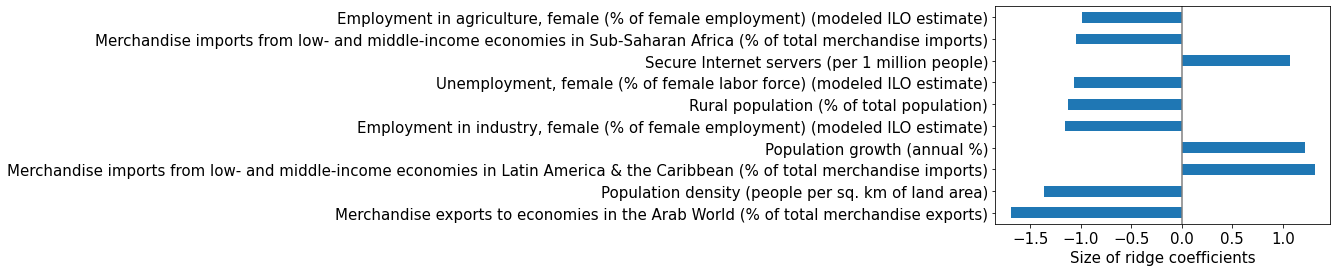

In [42]:
coef_df = pd.DataFrame(ridge.coef_[0], columns=["Coefficient"], index=wb_data.columns.values)
coef_df.sort_values("Coefficient", inplace=True, key=abs, ascending=False)

coef_df.iloc[:10,:].plot(kind="barh", legend=False, fontsize=15)
plt.axvline(x=0, color="grey")
plt.xlabel("Size of ridge coefficients", fontsize=15)
plt.savefig(fname="ridge_coefs.pdf", format="pdf", bbox_inches="tight")

## Lasso regression

In [39]:
#Note: The alpha value was edited later, it corresponds to the alpha which yielded the best test loss after trying out a bunch of different alphas
lasso = sklearn.linear_model.Lasso(alpha=0.001)

Mean loss (full set of indicators): 0.38608232041358537
The average size of the first ten coefficients ((full set of indicators)): 0.6043 

Mean loss (reduced set of indicators): 0.3694815331093376
The average size of the first ten coefficients (reduced set of indicators): 0.4937


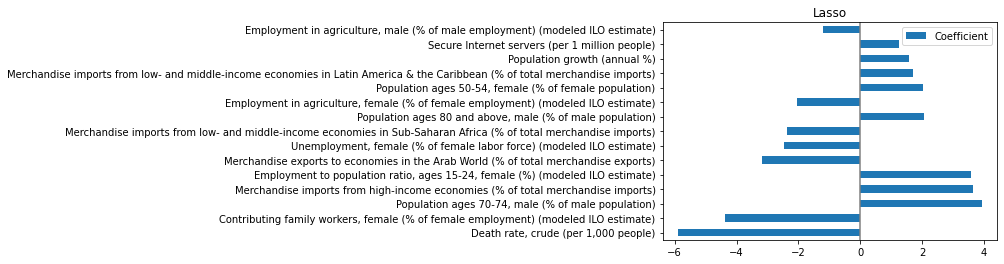

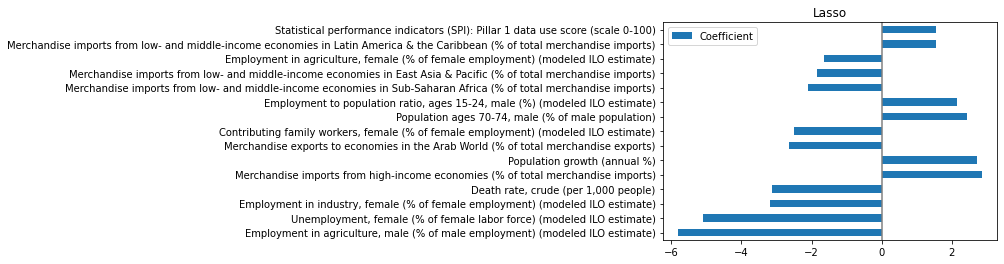

In [42]:
# For the full dense indicator data
loss_list, mean_loss, coef_list, avg_coefs = ana_utils.n_fold_ceval(reg_model=lasso, n=1000, data=wb_data, gt=whr_data, test_size=test_size, scaling="normalize")
print("Mean loss (full set of indicators):", mean_loss)
print("The average size of the first ten coefficients ((full set of indicators)):", avg_coefs, "\n")
#vis_utils.visualize_predictions(reg_model=lasso, data=wb_data, gt=whr_data)
vis_utils.visualize_coefs(reg_model=lasso, indicators=wb_data.columns.values, n=15)

loss_list, mean_loss, coef_list, avg_coefs = ana_utils.n_fold_ceval(reg_model=lasso, n=1000, data=wb_data_short, gt=whr_data, test_size=test_size, scaling="normalize")
print("Mean loss (reduced set of indicators):", mean_loss)
print("The average size of the first ten coefficients (reduced set of indicators):", avg_coefs)
#vis_utils.visualize_predictions(reg_model=lasso, data=wb_data, gt=whr_data)
vis_utils.visualize_coefs(reg_model=lasso, indicators=wb_data_short.columns.values, n=15)

## Optimizing penalty parameter $\alpha$

In [7]:
alphas = [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 0.15, 0.25, 0.5, 1, 10, 100]

Mean test loss for Ridge (alpha = 0.0001 ): 1.4801121484935407
Mean train loss for Ridge (alpha = 0.0001 ): 0.03644418069033448


/home/christian/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.019507761506920573, tolerance: 0.015877732005275168
  model = cd_fast.enet_coordinate_descent(


Mean test loss for Lasso (alpha = 0.0001 ): 0.5737557167795281
Mean train loss for Lasso (alpha = 0.0001 ): 0.08499598870528641
max coef:  17.57980196769384
Mean test loss for Ridge (alpha = 0.001 ): 0.7662590062991045
Mean train loss for Ridge (alpha = 0.001 ): 0.06803063737607018
Mean test loss for Lasso (alpha = 0.001 ): 0.3830587846965133
Mean train loss for Lasso (alpha = 0.001 ): 0.1708777914146306
max coef:  6.69593451125597
Mean test loss for Ridge (alpha = 0.005 ): 0.5517496897004933
Mean train loss for Ridge (alpha = 0.005 ): 0.09289245577375844
Mean test loss for Lasso (alpha = 0.005 ): 0.41810655753635845
Mean train loss for Lasso (alpha = 0.005 ): 0.2921425886762866
max coef:  5.037420266838509
Mean test loss for Ridge (alpha = 0.01 ): 0.4763663632175719
Mean train loss for Ridge (alpha = 0.01 ): 0.10626140695249457
Mean test loss for Lasso (alpha = 0.01 ): 0.5058172718069055
Mean train loss for Lasso (alpha = 0.01 ): 0.40994042992175367
max coef:  4.8385271370968965
Mean 

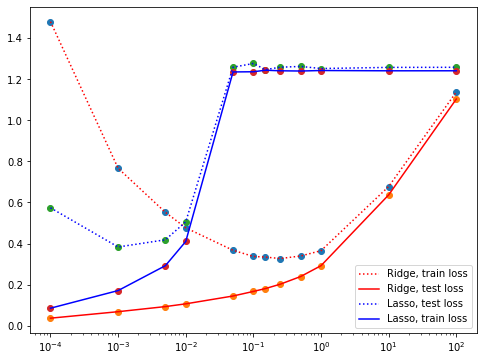

In [8]:
# ridge mean loss list and lasso mean loss list
r_testml_list = []
r_trainml_list = []
l_testml_list = []
l_trainml_list = []

for alpha in alphas:
    ridge = sklearn.linear_model.Ridge(alpha=alpha)    
    _, ridge_mean_test_loss, ridge_mean_train_loss, _, _, _ = ana_utils.n_fold_ceval(reg_model=ridge, n=1000, data=wb_data, gt=whr_data, test_size=test_size, 
                                                                                     scaling="normalize", calc_adj_r_squared=True)
    print("Mean test loss for Ridge (alpha =",alpha,"):",ridge_mean_test_loss)
    print("Mean train loss for Ridge (alpha =",alpha,"):",ridge_mean_train_loss)
    r_testml_list.append(ridge_mean_test_loss)
    r_trainml_list.append(ridge_mean_train_loss)
    
    lasso = sklearn.linear_model.Lasso(alpha=alpha, max_iter=10000)
    _, lasso_mean_test_loss, lasso_mean_train_loss, _, _, _ = ana_utils.n_fold_ceval(reg_model=lasso, n=1000, data=wb_data, gt=whr_data, test_size=test_size, 
                                                                                     scaling="normalize", calc_adj_r_squared=True)
    print("Mean test loss for Lasso (alpha =", alpha, "):", lasso_mean_test_loss)
    print("Mean train loss for Lasso (alpha =", alpha, "):", lasso_mean_train_loss)
    print("max coef: ", max(abs(lasso.coef_)))
    l_testml_list.append(lasso_mean_test_loss)
    l_trainml_list.append(lasso_mean_train_loss)

vis_utils.visualize_alphas(alphas, [r_testml_list, r_trainml_list, l_testml_list, l_trainml_list])


## Partial Least Squares Regression

In [9]:
from sklearn.cross_decomposition import PLSRegression

In [13]:
test_size=30
num_components = [1, 2, 3, 4, 5, 7, 10]
pls_loss_list = []

for n in num_components:
    pls = PLSRegression(n_components=n)
    _, pls_mean_test_loss, pls_mean_train_loss, _, _, r_sq = ana_utils.n_fold_ceval(reg_model=pls, n=3000, data=wb_data, gt=whr_data, test_size=test_size, 
                                                                                    scaling="normalize", calc_adj_r_squared=True)
    print("Mean test loss for PLS (n =", n, "):", pls_mean_test_loss)
    print("Mean train loss for PLS (n =", n, "):", pls_mean_train_loss)
    print("Adjusted R-Squared: ", r_sq, "\n")

Mean test loss for PLS (n = 1 ): 0.5271119666525991
Mean train loss for PLS (n = 1 ): 0.49441788962733374
Adjusted R-Squared:  2.2840112641400836 

Mean test loss for PLS (n = 2 ): 0.4030904486922028
Mean train loss for PLS (n = 2 ): 0.33252949295547274
Adjusted R-Squared:  1.8629702756320603 

Mean test loss for PLS (n = 3 ): 0.3645541443150258
Mean train loss for PLS (n = 3 ): 0.24175787374480343
Adjusted R-Squared:  1.627945952245325 

Mean test loss for PLS (n = 4 ): 0.3564261169443693
Mean train loss for PLS (n = 4 ): 0.19886266459418186
Adjusted R-Squared:  1.5164483124588217 

Mean test loss for PLS (n = 5 ): 0.35995186240583116
Mean train loss for PLS (n = 5 ): 0.16825254611623072
Adjusted R-Squared:  1.4381766967717722 

Mean test loss for PLS (n = 7 ): 0.40651315397824905
Mean train loss for PLS (n = 7 ): 0.13928942733071442
Adjusted R-Squared:  1.3612066903983524 

Mean test loss for PLS (n = 10 ): 0.5003934826702545
Mean train loss for PLS (n = 10 ): 0.10403228732729769
Adj

At around 3 or 4 components, increasing n_components doesn't decrease test loss and the model starts to overfit. From now on, we will use n_components=4 because this setting yielded the lowest test loss.

In the following, we visualize which indicators have the biggest influence. We visualize the most influential indicators first per component, and then the most influental indicators in total (summing over all four components).

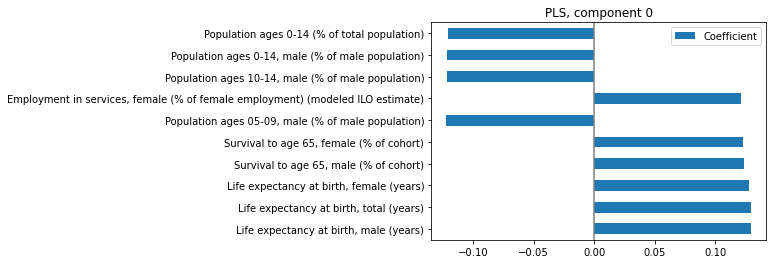

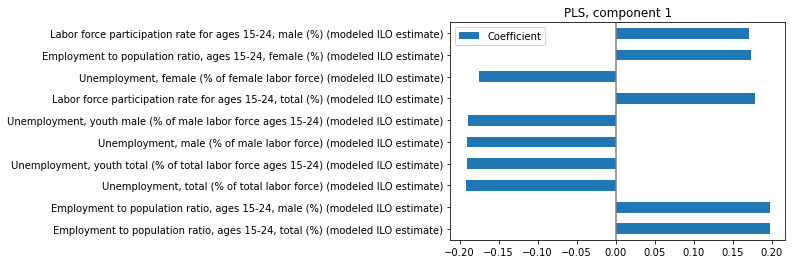

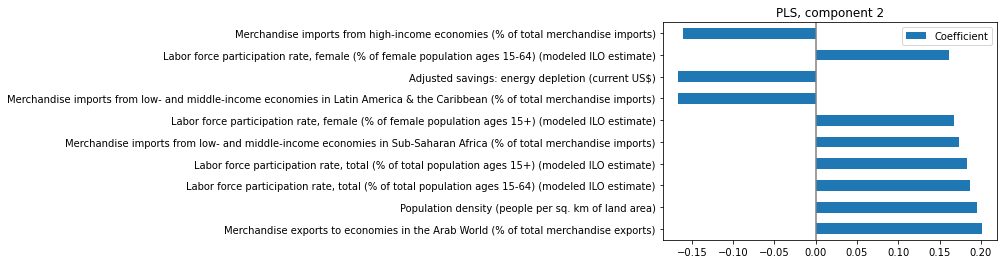

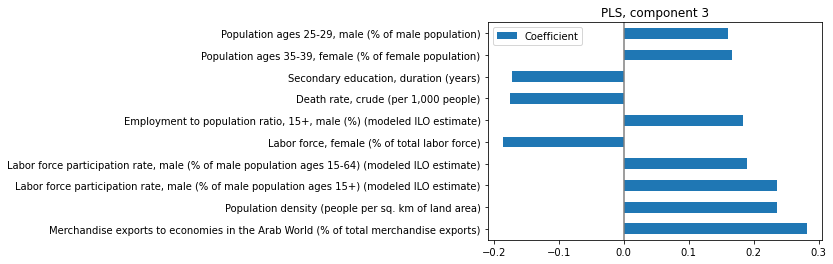

In [21]:
# re-run regression with n_components=4
pls = PLSRegression(n_components=4)
_, _, _, _, _, _ = ana_utils.n_fold_ceval(reg_model=pls, n=3000, data=wb_data, gt=whr_data, test_size=test_size, 
                                                                                scaling="normalize", calc_adj_r_squared=True)
components = pls.x_weights_
components = [pd.DataFrame(components[:,0], columns=["Coefficient"], index=wb_data.columns.values),
              pd.DataFrame(components[:,1], columns=["Coefficient"], index=wb_data.columns.values),
              pd.DataFrame(components[:,2], columns=["Coefficient"], index=wb_data.columns.values),
              pd.DataFrame(components[:,3], columns=["Coefficient"], index=wb_data.columns.values),]

# plot 10 largest coefficients for each component
for i in range(0,4):
    components[i].sort_values("Coefficient", inplace=True, key=abs, ascending=False)
    components[i].iloc[:10,:].plot(kind="barh")
    plt.axvline(x=0, color="grey")
    title = "PLS, component " + str(i)
    plt.title(title)

Text(0.5, 1.0, 'PLS, sum of all components')

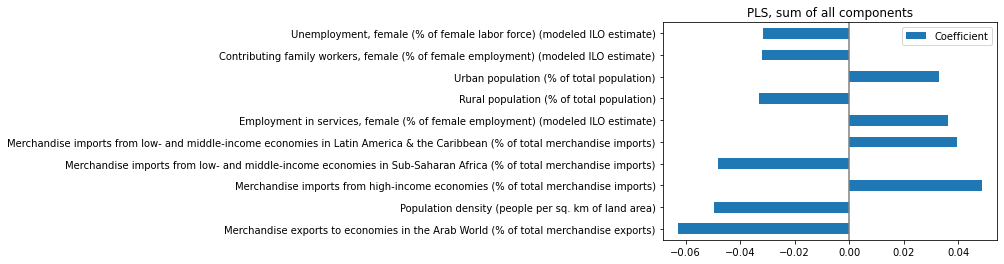

In [38]:
sum_components = np.zeros([156])

# take weighted sum of components
for i in range(0,4): 
    sum_components += pls.y_weights_[0,i] * pls.x_weights_[:,i]

df_sum_comp = pd.DataFrame(sum_components, columns=["Coefficient"], index=wb_data.columns.values)
df_sum_comp.sort_values("Coefficient", inplace=True, key=abs, ascending=False)
df_sum_comp.iloc[:10,:].plot(kind="barh")
plt.axvline(x=0, color="grey")
title = "PLS, sum of all components"
plt.title(title)